<a href="https://colab.research.google.com/github/abhijithneilabraham/2000Line/blob/master/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

number of instances:  16998
16996 train samples
0 test samples
Epoch 1/10
256/256 [==============================] - 17s 66ms/step - loss: 1.7867 - acc: 0.2592
Epoch 2/10
256/256 [==============================] - 15s 60ms/step - loss: 1.5570 - acc: 0.3832
Epoch 3/10
256/256 [==============================] - 16s 61ms/step - loss: 1.3474 - acc: 0.4815
Epoch 4/10
256/256 [==============================] - 16s 61ms/step - loss: 1.2113 - acc: 0.5376
Epoch 5/10
256/256 [==============================] - 16s 61ms/step - loss: 1.0966 - acc: 0.5841
Epoch 6/10
256/256 [==============================] - 16s 61ms/step - loss: 0.9832 - acc: 0.6303
Epoch 7/10
256/256 [==============================] - 16s 61ms/step - loss: 0.8432 - acc: 0.6882
Epoch 8/10
256/256 [==============================] - 16s 61ms/step - loss: 0.7070 - acc: 0.7387
Epoch 9/10
256/256 [==============================] - 16s 61ms/step - loss: 0.5564 - acc: 0.7948
Epoch 10/10
256/256 [==============================] - 16s 61ms/

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


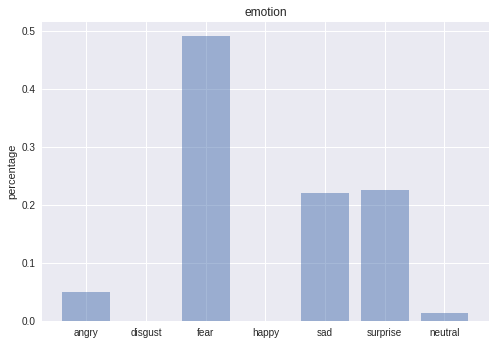

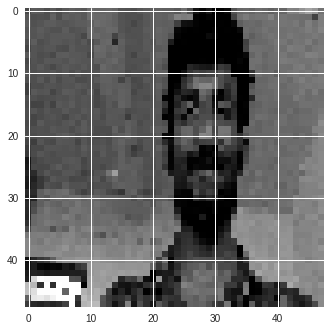

In [14]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 23 10:56:52 2019

@author: abhijithneilabraham
"""
import numpy as np
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Flatten,Dropout, AveragePooling2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 10
with open("fer2013.csv") as f:
    content = f.readlines()
     
    lines = np.array(content)
     
    num_of_instances = lines.size
    print("number of instances: ",num_of_instances)
x_train, y_train, x_test, y_test = [], [], [], []
 
for i in range(1,num_of_instances):
 try:
  emotion, img, usage = lines[i].split(",")
 
  val = img.split(" ")
  pixels = np.array(val, 'float32')
 
  emotion = keras.utils.to_categorical(emotion, num_classes)
 
  if 'Training' in usage:
   y_train.append(emotion)
   x_train.append(pixels)
  elif 'PublicTest' in usage:
   y_test.append(emotion)
   x_test.append(pixels)
 except:
  print("", end="")
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model=Sequential()

 
#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
 
#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
 
#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
 
model.add(Flatten())
 
#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
 
model.add(Dense(7, activation='softmax'))
gen = ImageDataGenerator()


train_generator = gen.flow(x_train, y_train, batch_size=batch_size)
 
model.compile(loss='categorical_crossentropy'
, optimizer=keras.optimizers.Adam()
, metrics=['accuracy']
)
 
model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs)
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])

model.save('test1.h5')
model.load_weights('test1.h5')
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()
    predictions = model.predict(x_test)
    index=0
    for i in predictions:
      if index < 30 and index >= 20:
      #print(i) #predicted scores
      #print(y_test[index]) #actual scores

        testing_img = np.array(x_test[index], 'float32')
        testing_img = testing_img.reshape([48, 48]);

        plt.gray()
        plt.imshow(testing_img)
        plt.show()

        print(i)

        emotion_analysis(i)
        print("----------------------------------------------")
      index = index + 1
img = image.load_img("test.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()


